# EDA on Customer Data

## Importing the libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [105]:
df = pd.read_csv("/Volumes/DATA/Assignment/Data/Customers - Customers.csv",header=0)
df_prod = pd.read_csv("/Volumes/DATA/Assignment/Data/Products - Products.csv", header = 0)
df_trans = pd.read_csv("/Volumes/DATA/Assignment/Data/Transactions - Transactions.csv", header =0)

## Preview Of the Data

In [32]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [33]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


## Shape of the Data

In [34]:
df.shape

(200, 4)

## Info of the Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


## Description of the Data  - Explanation of the Rows:
count:

The number of non-null (non-missing) values in each column.
In your case, all columns have 200 non-null entries.
unique:

The number of unique values in each column.
Example:
CustomerID has 200 unique values, meaning each customer has a unique ID.
CustomerName has 200 unique names (no duplicates).
Region has 4 unique values, such as "Asia," "Europe," "South America," etc.
SignupDate has 179 unique dates, meaning some customers signed up on the same date.
top:

The most frequently occurring value (mode) in each column.
Example:
CustomerID: The most frequent value is C0001.
CustomerName: The most frequent name is Lawrence Carroll.
Region: The most common region is South America.
SignupDate: The most frequent signup date is 2024-11-11.
freq:

The frequency (count) of the most frequently occurring value (from the top row).
Example:
CustomerID: C0001 appears 1 time (because IDs are unique).
Region: South America appears 59 times.
SignupDate: 2024-11-11 appears 3 times.

In [40]:
df.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


## List of Column Names

In [41]:
df.columns.tolist()

['CustomerID', 'CustomerName', 'Region', 'SignupDate']

## Checking for Missing Values

In [42]:
df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

## Checking for Duplicate Values

In [43]:
df.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

## Univariate Analysis - distribution of data

### Region Counts and Charts

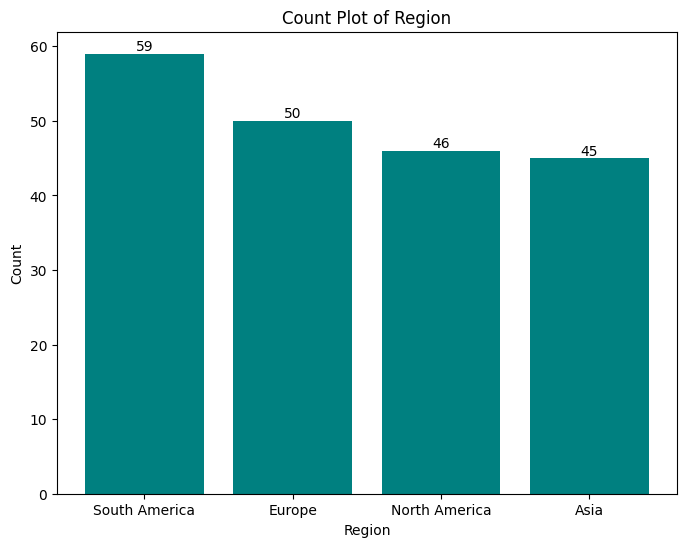

In [61]:
# Count the occurrences of each region
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(region_counts.index, region_counts, color='teal')

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Count Plot of Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

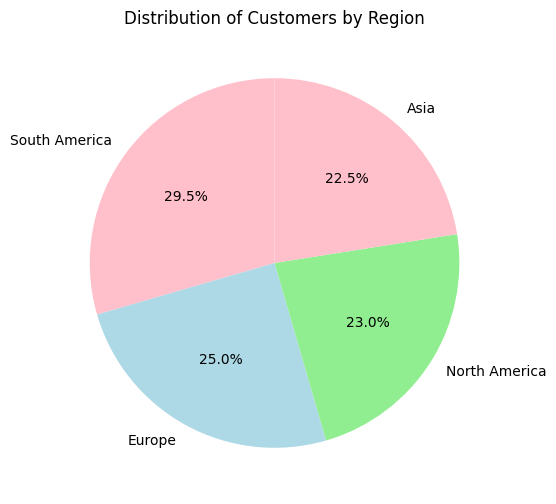

In [52]:
# Pie chart for Region
plt.figure(figsize=(8, 6))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue', 'lightgreen'])
plt.title('Distribution of Customers by Region')
plt.ylabel('')
plt.show()


## Multivariate Analysis - Correlation between Variables

Possible Business Insights:
Decline in 2023: This could indicate issues like reduced marketing efforts, decreased customer interest, or increased competition during that year.
Surge in 2024: Suggests successful campaigns, increased awareness, or positive word-of-mouth that brought more customers onboard.

### Monthly trend on SignUp

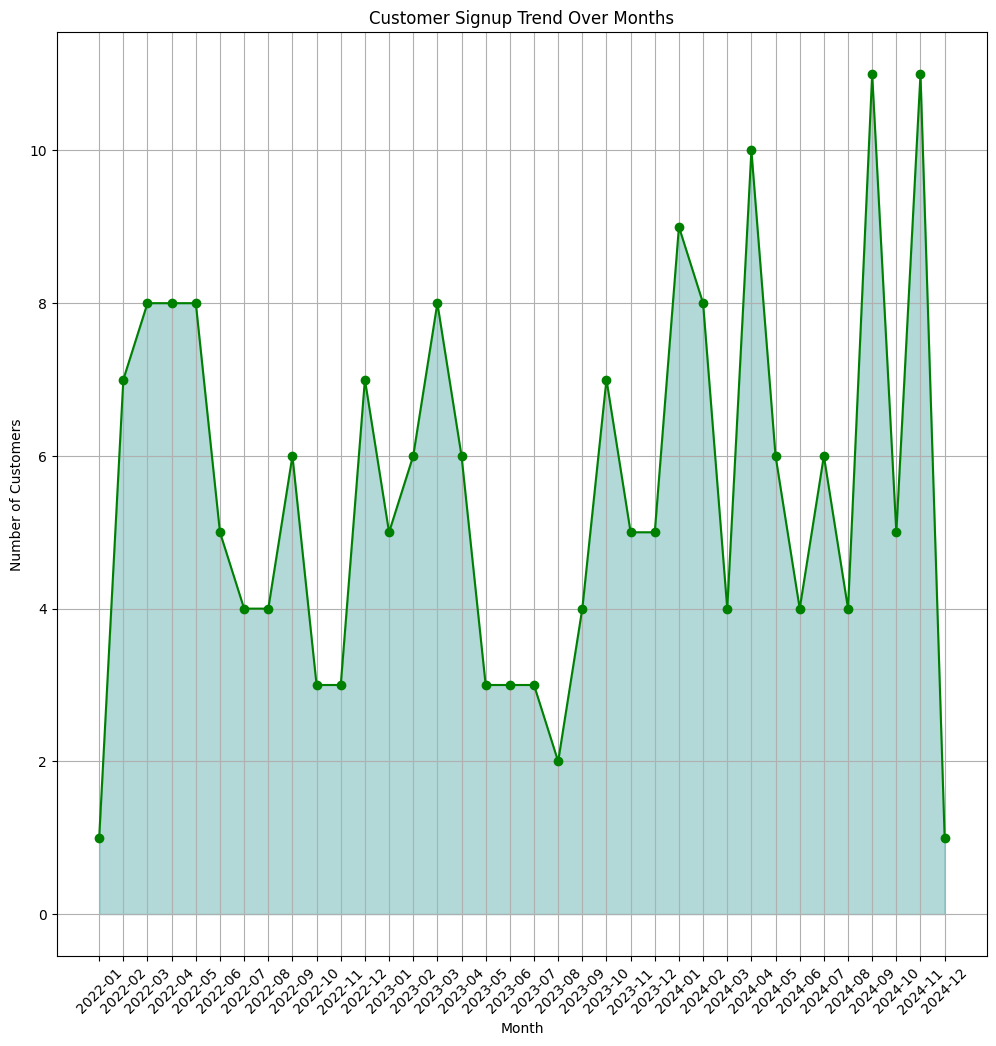

In [71]:
# Ensure SignupDate is of datetime type
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

df['SignupMonth'] = df['SignupDate'].dt.to_period('M')

signup_trend_month = df.groupby(df['SignupMonth']).size()

plt.figure(figsize=(12, 12))
plt.fill_between(signup_trend_month.index.astype(str), signup_trend_month.values, color='teal', alpha=0.3)
plt.plot(signup_trend_month.index.astype(str), signup_trend_month.values, marker='o', color='green')  # Optional, to keep the line on top
plt.title('Customer Signup Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid()
plt.xticks(rotation=45)
plt.show()


### Yearly trend on Signup

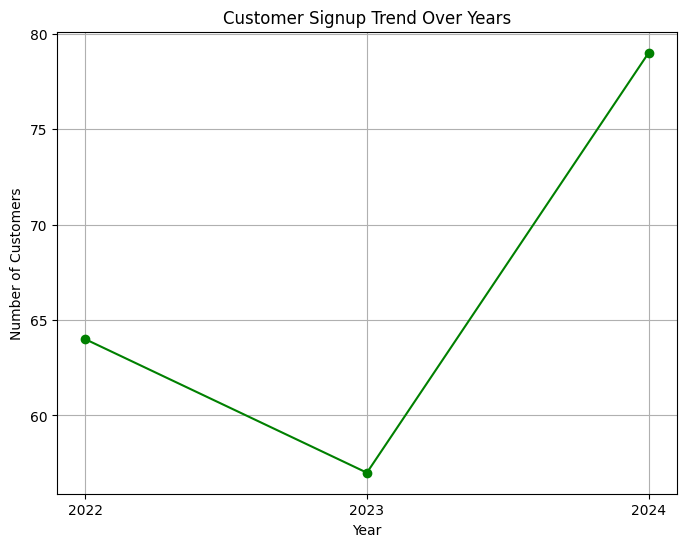

In [74]:
df['SignupYear'] = df['SignupDate'].dt.to_period('Y')

signup_trend = df.groupby(df['SignupYear']).size()

plt.figure(figsize=(8, 6))
plt.plot(signup_trend.index.astype(str), signup_trend.values, marker='o', color='green')
plt.title('Customer Signup Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()


## Multivariate Analysis - Complex patterns analysis

### Signup Frequency by Region and Year

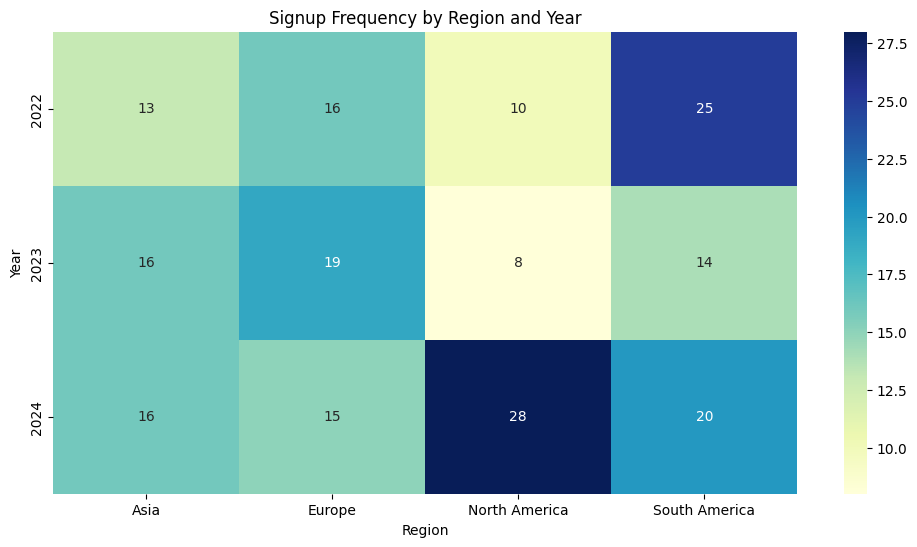

In [81]:
df['SignupYear'] = df['SignupDate'].dt.to_period('Y')
region_year_signup = df.groupby([df['SignupYear'], df['Region']]).size().unstack().fillna(0)

# Heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(region_year_signup, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Signup Frequency by Region and Year')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()


### Month-wise Signup Trend by Region

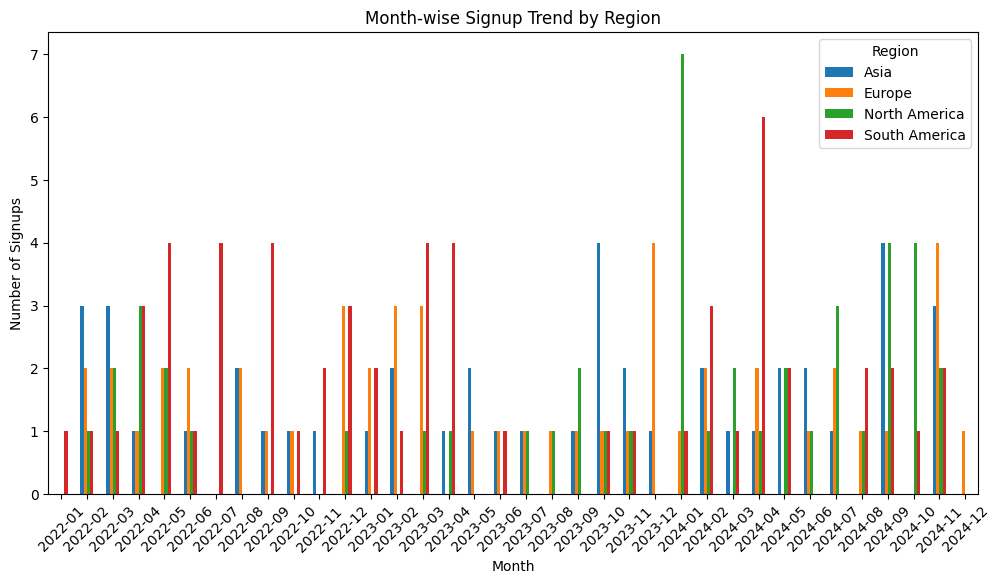

In [84]:
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
region_month = df.groupby([df['SignupMonth'], df['Region']]).size().unstack()

# Grouped bar plot
region_month.plot(kind='bar', figsize=(12, 6))
plt.title('Month-wise Signup Trend by Region')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()


# EDA on Products Data

## Reading Dataset

In [91]:
df_prod = pd.read_csv('/Volumes/DATA/Assignment/Data/Products - Products.csv',header = 0)

## Preview of the Data

In [92]:
df_prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [93]:
df_prod.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


## Shape of the Data

In [94]:
df_prod.shape

(100, 4)

## Info of th Data

In [95]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


## Description of the Data

In [96]:
df_prod.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


## List of Column Names

In [97]:
df_prod.columns.tolist()

['ProductID', 'ProductName', 'Category', 'Price']

## Checking for Missing Values

In [99]:
df_prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

## Univariate Analysis